<a href="https://colab.research.google.com/github/javiervz/network_science/blob/master/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A crash course on Graph Theory :)**



A graph $G=(V,E)$ is a pair completely defined by:

1. the set of **nodes** $V\neq \emptyset$
2. the set of **edges** $E$ 

We denote $|V|=n$ and $|E|=m$. 




**Question 1:** Determine the number of edges if there is an edge for every pair of nodes of the graph $G$ 

The **density** of a graph $G$ is $$\frac{2m}{n(n-1)}$$

In [0]:
## important libraries!!!
import networkx as nx
import matplotlib.pyplot as plt
import random

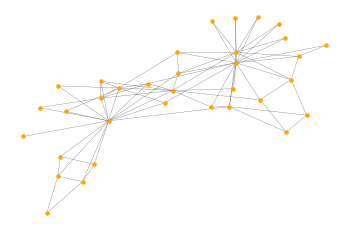

In [2]:
## an example
G = nx.karate_club_graph()

## visualization
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 12, node_color='orange') 
nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='k')
plt.axis('off')
plt.show()

In [0]:
density=nx.density(G)

In [4]:
density

0.13903743315508021

A graph of density 1 is said to be **complete**, denoted as $K_n$ ($n$ is the size of the set of nodes)

In [0]:
def plot_graph(G):
  pos = nx.spring_layout(G)
  labels={i:i for i in G.nodes}
  nx.draw_networkx_nodes(G, pos, node_size = 200, node_color='orange') 
  nx.draw_networkx_edges(G, pos, alpha=1.,width=0.75,edge_color='m')
  nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=15,font_color='k')
  plt.axis('off')
  plt.show()

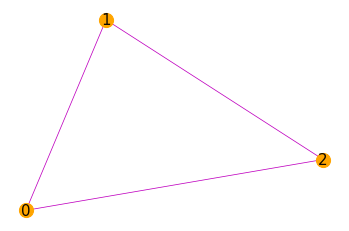

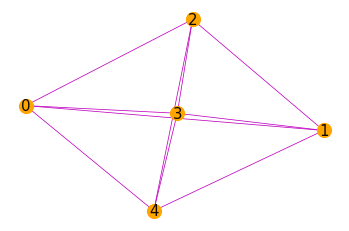

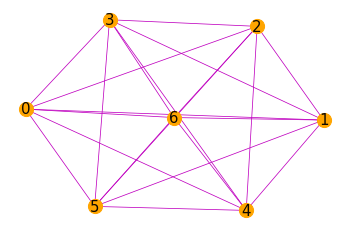

In [6]:
## complete graphs!!!
for k in [3,5,7]:
  Kn=nx.complete_graph(k)
  plot_graph(Kn)



**Question 2:** How to scales the number of edges  as a function of $n$?

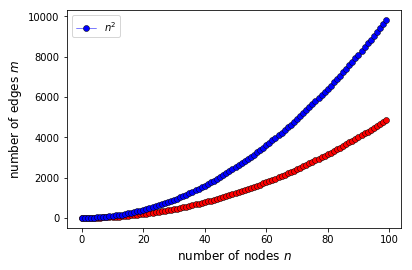

In [7]:
X=range(100)
Y=[nx.complete_graph(x) for x in X]


plt.plot(X,[nx.number_of_edges(G) for G in Y],marker='o',color='r',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5)
plt.plot(X,[x**2 for x in X],marker='o',color='b',markersize=6,markeredgecolor='k',markeredgewidth=0.5,fillstyle='full',clip_on=True,linewidth=0.5,label=r'$n^2$')

plt.grid(False)
plt.legend(loc='best')

plt.ylabel(r'number of edges $m$',fontsize=12)
plt.xlabel(r'number of nodes $n$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.show()

**Question 3:** How many complete graphs of $n$ nodes we can define?

Two graphs $G=(V,E)$ and $G'=(V',E')$, with $|V|=|V'|$, are said to be  **isomorphic** if there is a bijection $\phi: V \rightarrow V'$ such that if $(u,v) \in V$ iff $(\phi(u),\phi(v))
\in V'$. 

---



Two small graphs $G_1$ and $G_2$

In [0]:
G1=nx.Graph()
G2=nx.Graph()

In [0]:
G1.add_edge(1,2)
G1.add_edge(2,3)
G1.add_edge(3,4)
G1.add_edge(4,1)

In [0]:
G2.add_edge(1,2)
G2.add_edge(2,4)
G2.add_edge(4,3)
G2.add_edge(3,1)

In [11]:
G1.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})])

In [12]:
G2.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (2, 4, {}), (4, 3, {})])

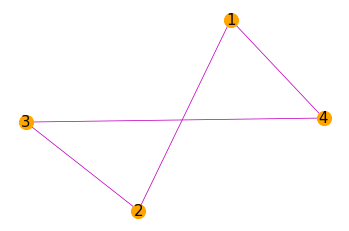

In [13]:
plot_graph(G1)

    

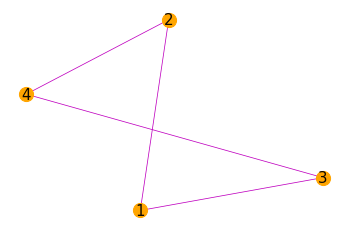

In [14]:
plot_graph(G2)

**Question 4:** Determine if $G_1$ and $G_2$ are isomorphic.  

Consider:

1. $G=(V,E)$.
2. a subset $V'\subseteq V$

Then, the **subgraph induced** by $V'$ is the pair $G'=(V',E')$, where $E'$ contains all links of $G$ that join nodes in $V'$. 

**Question 5:** Consider the complete graph $K_4$. Determine the subgraph induced by any three-node combination. 

In [0]:
K4=nx.complete_graph(4)

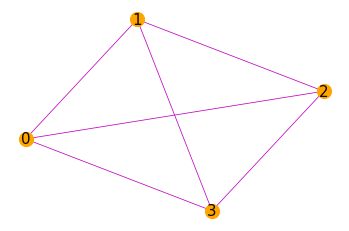

In [16]:
plot_graph(K4)

In [0]:
## remove node 1
K4.remove_node(1)

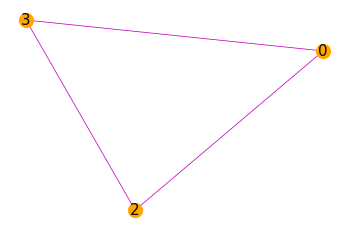

In [18]:
plot_graph(K4)

In [0]:
## again K4
K4=nx.complete_graph(4)

In [0]:
## subgraph induced by [1,2,3]
S=K4.subgraph([1,2,3])

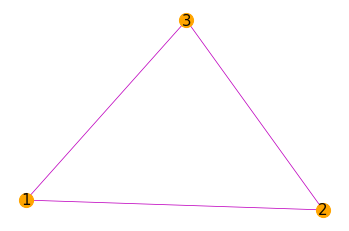

In [21]:
plot_graph(S)

**Question 6:** Remove iteratively nodes in order to increase density of graph G = nx.karate_club_graph()


density=0.13903743315508021


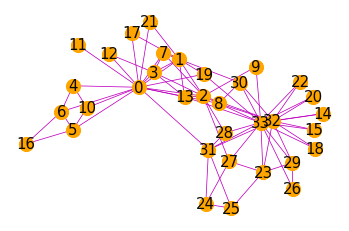

removed node: 29 density=0.14015151515151514


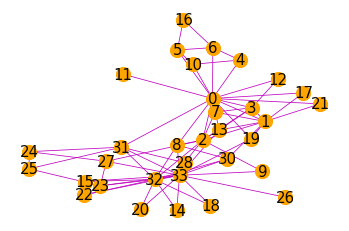

removed node: 19 density=0.1431451612903226


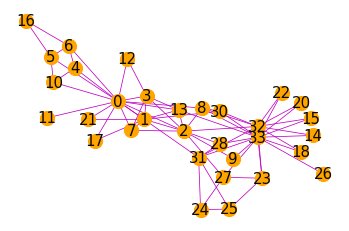

removed node: 21 density=0.14838709677419354


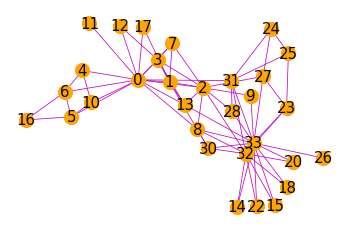

removed node: 18 density=0.15402298850574714


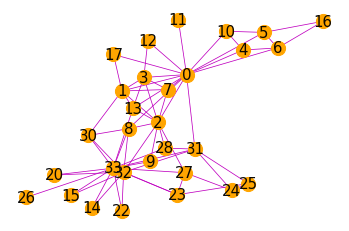

removed node: 17 density=0.16


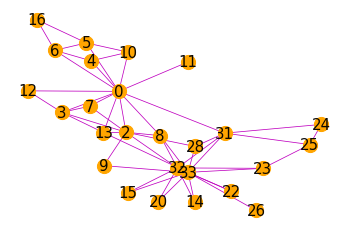

removed node: 26 density=0.17


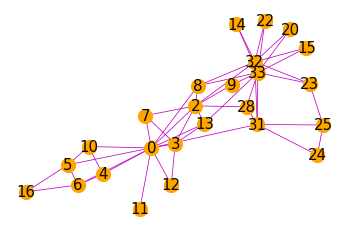

removed node: 12 density=0.17753623188405798


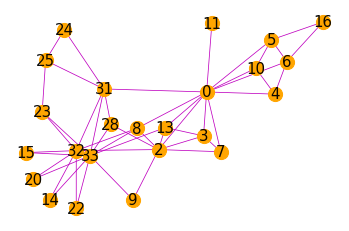

removed node: 5 density=0.17786561264822134


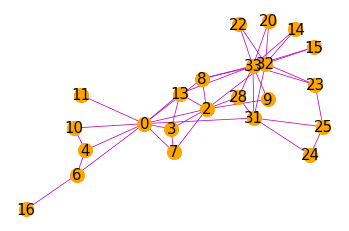

removed node: 24 density=0.17894736842105263


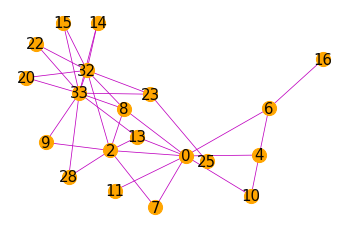

removed node: 4 density=0.18128654970760233


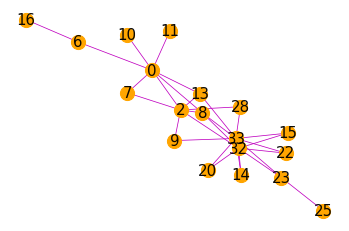

removed node: 25 density=0.19607843137254902


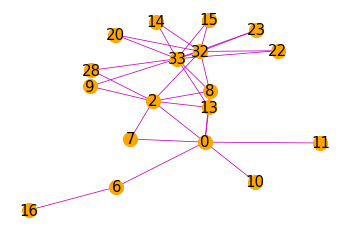

removed node: 6 density=0.21212121212121213


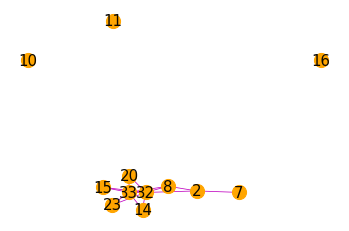

removed node: 11 density=0.2545454545454545


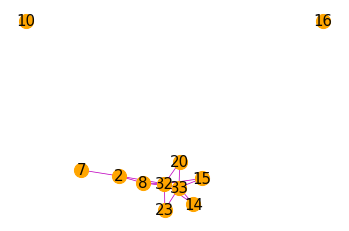

In [22]:
G = nx.karate_club_graph()
density=nx.density(G)
print('density='+str(density))
plot_graph(G)

while len(G)>0:
  node=random.choice(list(G.nodes))
  G.remove_node(node)
  density_remove=nx.density(G)
  if density_remove>density:
    print('removed node: '+str(node)+' '+'density='+str(density_remove))
    density=density_remove
    plot_graph(G)
  

Consider a graph $G=(V,E)$. The **neighborhood** of a node $u \in U$ is defined as $$V_u=\{v\in U: (u,v)\in E\}$$ 

**Question 7:**

1. Represent a **chessboard** as a graph $C$
2. Define different types of neighborhoods in $C$
3. How to define a neighborhood of radius $r$?

In [0]:
## grid graph!
grid=nx.grid_graph([2,3], periodic=True)

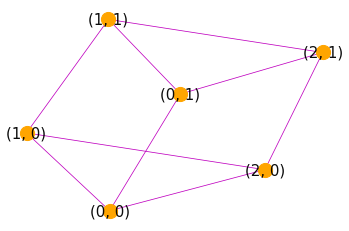

In [28]:
plot_graph(grid)

**Question 8:** What is the meaning of periodic=True?

A **directed** graph $G=(V,E)$ is a pair formed by a set of nodes $V$ and an ordered set of edges $E$. For this type of graphs, $(u,v) \neq (v,u)$.